## Library import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import numpy as np
from matplotlib import font_manager, rc
from tqdm import tqdm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## Data load

In [3]:
path = '../data/'
data = pd.read_csv(path +'201901-202003.csv')
new_data = pd.read_csv(path + '202004.csv')
gc.collect()

7

In [4]:
data = pd.concat([data, new_data], axis = 0)
data

REG_YYMM CARD_SIDO_NM CARD_CCG_NM STD_CLSS_NM HOM_SIDO_NM HOM_CCG_NM  \
0          201901           강원         강릉시  건강보조식품 소매업          강원        강릉시   
1          201901           강원         강릉시  건강보조식품 소매업          강원        강릉시   
2          201901           강원         강릉시  건강보조식품 소매업          강원        강릉시   
3          201901           강원         강릉시  건강보조식품 소매업          강원        강릉시   
4          201901           강원         강릉시  건강보조식품 소매업          강원        강릉시   
...           ...          ...         ...         ...         ...        ...   
1350317    202004           충북         충주시    휴양콘도 운영업          충북        충주시   
1350318    202004           충북         충주시    휴양콘도 운영업          충북        충주시   
1350319    202004           충북         충주시    휴양콘도 운영업          충북        충주시   
1350320    202004           충북         충주시    휴양콘도 운영업          충북        충주시   
1350321    202004           충북         충주시    휴양콘도 운영업          충북        충주시   

         AGE  SEX_CTGO_CD  FLC  CSTMR_CNT      AMT  CNT  
0        20s            1    1          4   311200    4  
1        30s            1    2          7  1374500    8  
2        30s            2    2          6   818700    6  
3        40s            1    3          4  1717000    5  
4        40s            1    4          3  1047300    3  
...      ...          ...  ...        ...      ...  ...  
1350317  20s            1    1          5    77000    5  
1350318  30s            1    2          6    92000    6  
1350319  40s            2    3          5   193000    5  
1350320  50s            1    4          5    86000    7  
1350321  60s            2    5          3   227000    4  

[26048114 rows x 12 columns]

## Get new dataframe

In [6]:
#----------------------------------------------
## <group_city_clss_time>
# 데이터를 날짜, 도시, 업종으로 groupby
# 인덱싱을 편하게 하기 위해 row를 CARD_SIDO_NM,	STD_CLSS_NM, REG_YYMM 3개의 level로 표현
group_city_clss_time = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .sum()
group_city_clss_time = pd.DataFrame(group_city_clss_time)
gc.collect()
#group_data는 'AMT'하나만 column으로 갖는다.
#group_city_clss_time = np.log(group_city_clss_time)
print('group_city_clss_time')
display(group_city_clss_time)
#----------------------------------------------
## <group_data>
group_data = np.log(group_city_clss_time)
print('group_data')
display(group_data)
#----------------------------------------------
## <group_city_clss_time_count>
group_city_clss_time_count = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .count()
group_city_clss_time_count = pd.DataFrame(group_city_clss_time_count)
group_city_clss_time_count.columns = ['COUNT']
print('group_city_clss_time_count')
display(group_city_clss_time_count)
#----------------------------------------------
## <group_city_clss>
data['sido_clss_rows_under'] = (data.CSTMR_CNT <= 3) * 1
group_city_clss = pd.DataFrame(data.loc[:, ['CARD_SIDO_NM', 'STD_CLSS_NM', 'sido_clss_rows_under']].\
                               groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])[['sido_clss_rows_under']].sum())
group_city_clss['total_rows'] = data.loc[:, ['CARD_SIDO_NM', 'STD_CLSS_NM', 'sido_clss_rows_under']].\
                               groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])[['sido_clss_rows_under']].count()
group_city_clss['p'] = group_city_clss.sido_clss_rows_under / group_city_clss.total_rows
group_city_clss['std_error'] = 0
print('group_city_clss')
display(group_city_clss)
gc.collect()

group_city_clss_time


AMT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM           
강원           건강보조식품 소매업  201901    148354746
                         201902    146715871
                         201903    109439025
                         201904    106548473
                         201905    148115738
...                                      ...
충북           휴양콘도 운영업    201912    139568962
                         202001    222073112
                         202002     47085830
                         202003     12733490
                         202004      9328420

[10048 rows x 1 columns]

group_data


AMT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM           
강원           건강보조식품 소매업  201901    18.815117
                         201902    18.804008
                         201903    18.510878
                         201904    18.484111
                         201905    18.813505
...                                      ...
충북           휴양콘도 운영업    201912    18.754069
                         202001    19.218517
                         202002    17.667483
                         202003    16.359746
                         202004    16.048576

[10048 rows x 1 columns]

group_city_clss_time_count


COUNT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM       
강원           건강보조식품 소매업  201901       94
                         201902      104
                         201903       86
                         201904      104
                         201905      108
...                                  ...
충북           휴양콘도 운영업    201912      349
                         202001      484
                         202002      127
                         202003       35
                         202004       32

[10048 rows x 1 columns]

group_city_clss


sido_clss_rows_under  total_rows  \
CARD_SIDO_NM STD_CLSS_NM                                               
강원           건강보조식품 소매업                              449        1550   
             골프장 운영업                                9417       34099   
             과실 및 채소 소매업                           10402       28717   
             관광 민예품 및 선물용품 소매업                      2614        4565   
             그외 기타 분류안된 오락관련 서비스업                      2           2   
...                                                  ...         ...   
충북           피자 햄버거 샌드위치 및 유사 음식점업                 12386       37711   
             한식 음식점업                               45582      215298   
             호텔업                                     649        1335   
             화장품 및 방향제 소매업                          1482        7866   
             휴양콘도 운영업                               2494        5330   

                                           p  std_error  
CARD_SIDO_NM STD_CLSS_NM                                 
강원           건강보조식품 소매업             0.289677          0  
             골프장 운영업                0.276166          0  
             과실 및 채소 소매업            0.362224          0  
             관광 민예품 및 선물용품 소매업      0.572618          0  
             그외 기타 분류안된 오락관련 서비스업   1.000000          0  
...                                      ...        ...  
충북           피자 햄버거 샌드위치 및 유사 음식점업  0.328445          0  
             한식 음식점업                0.211716          0  
             호텔업                    0.486142          0  
             화장품 및 방향제 소매업          0.188406          0  
             휴양콘도 운영업               0.467917          0  

[650 rows x 4 columns]

0

### Get std_error, error_group and uncomplete_group

In [7]:
days = group_data.reset_index()['REG_YYMM'].unique().astype('str') # REG_YYMM를 string으로 변환
citys = data.CARD_SIDO_NM.unique() # citys : 지역(시도)의 이름들을 list로 저장
error_group = [] # std가 0.3이상인 그룹 저장
uncomplete_group = [] # 모든 월별 데이터가 없는 그룹 저장

for city in tqdm(citys):
    clsses = data[data.CARD_SIDO_NM == city].STD_CLSS_NM.unique()
    # 특정지역에서는 업종이 없는 경우도 있음.
    # 지역별로 업종 list를 새로 생성
    for clss in clsses:
        y = group_data.loc[city, clss,:].values.reshape(-1)
        if len(y) == len(days):
            x = np.arange(12).reshape(-1,1)
            y_pred = np.zeros(12)
            y_pred[:] = y[:12].mean()
            std = y[:12].std()
            group_city_clss.loc[(city, clss),'std_error'] = std
            if 0.3 < std:
                error_group.append((city, clss))
            else: 
                pass
        else:
            uncomplete_group.append((city, clss))
            group_city_clss.loc[(city, clss),'std_error'] = -1
#del group_data
gc.collect()
group_city_clss

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [01:37<00:00,  5.73s/it]


sido_clss_rows_under  total_rows  \
CARD_SIDO_NM STD_CLSS_NM                                               
강원           건강보조식품 소매업                              449        1550   
             골프장 운영업                                9417       34099   
             과실 및 채소 소매업                           10402       28717   
             관광 민예품 및 선물용품 소매업                      2614        4565   
             그외 기타 분류안된 오락관련 서비스업                      2           2   
...                                                  ...         ...   
충북           피자 햄버거 샌드위치 및 유사 음식점업                 12386       37711   
             한식 음식점업                               45582      215298   
             호텔업                                     649        1335   
             화장품 및 방향제 소매업                          1482        7866   
             휴양콘도 운영업                               2494        5330   

                                           p  std_error  
CARD_SIDO_NM STD_CLSS_NM                                 
강원           건강보조식품 소매업             0.289677   0.237975  
             골프장 운영업                0.276166   0.614788  
             과실 및 채소 소매업            0.362224   0.155196  
             관광 민예품 및 선물용품 소매업      0.572618   0.318397  
             그외 기타 분류안된 오락관련 서비스업   1.000000  -1.000000  
...                                      ...        ...  
충북           피자 햄버거 샌드위치 및 유사 음식점업  0.328445   0.065237  
             한식 음식점업                0.211716   0.062572  
             호텔업                    0.486142   0.232293  
             화장품 및 방향제 소매업          0.188406   0.091612  
             휴양콘도 운영업               0.467917   0.404723  

[650 rows x 4 columns]

In [8]:
error_group[:10] # std가 0.3을 넘는 그룹 중 10개만 보여주기

[('강원', '골프장 운영업'),
 ('강원', '관광 민예품 및 선물용품 소매업'),
 ('강원', '전시 및 행사 대행업'),
 ('강원', '호텔업'),
 ('강원', '휴양콘도 운영업'),
 ('강원', '여행사업'),
 ('강원', '자동차 임대업'),
 ('강원', '기타 수상오락 서비스업'),
 ('강원', '내항 여객 운송업'),
 ('경기', '골프장 운영업')]

In [9]:
uncomplete_group[:10] # 모든 월별 데이터가 없는 그룹 중 10개만 보여주기

[('강원', '면세점'),
 ('강원', '버스 운송업'),
 ('강원', '택시 운송업'),
 ('강원', '그외 기타 분류안된 오락관련 서비스업'),
 ('경기', '내항 여객 운송업'),
 ('경기', '그외 기타 분류안된 오락관련 서비스업'),
 ('경남', '자동차 임대업'),
 ('경북', '그외 기타 분류안된 오락관련 서비스업'),
 ('경북', '여행사업'),
 ('경북', '내항 여객 운송업')]

## Find Pattern
1. Non-Cov AMT 결정
#### Pseudocode
```python
        if std > 0.3:
        if p < 0.5:  ## 변동성이 적다.
             cov_ratio = (20Y03M/20Y02M) / (19Y03M/19Y02M)
                
            if 변화가 선형적이다: .........1)
                예측7월 <- 올해4월 * cov_ratio
                올해4월 <- 올해 3월 * cov_ratio
                
            else 변화가 비선형적이다:
                if 계절성을 갖는다.: .........2)
                    예측7월 <- 작년 7월 * cov_ratio
                    예측4월 <- 작년 4월 * cov_ratio

                elif 특별한 규칙이 없다: .........3)
                    cov_ratio = (20Y03M + 20Y02M) / (19Y03M + 19Y02M)
                    # 특별한 규칙이 없는 경우는 19년 2,3월과
                    # 20년 2,3월의 스케일만을 비교하는 것이 더 효율적이다.
                    예측7월 <- 전체 평균을 사용 * cov_ratio
                    예측4월 <- 전체 평균을 사용 * cov_ratio
                    
        elif p >= 0.5:  ## 변동성이 크다.
            cov_ratio = (20Y03M/20Y02M) / (19Y03M/19Y02M)
            
            if 변화가 선형적이다: .........4)
                예측7월 <- 올해4월  * cov_ratio

            else 변화가 비선형적이다:
                if 계절성을 갖는다.: .........5)
                    예측7월 <- 작년 6월 ~ 8월 평균
                    예측4월 <- 작년 2월 ~ 3월 평균

                elif 특별한 규칙이 없다: .........6)
                    예측7월 <- 전체 평균을 사용
                    예측4월 <- 전체 평균을 사용
            
    else std <= 0.3:
        전체 평균을 사용한다. .........7)
```

## find p

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


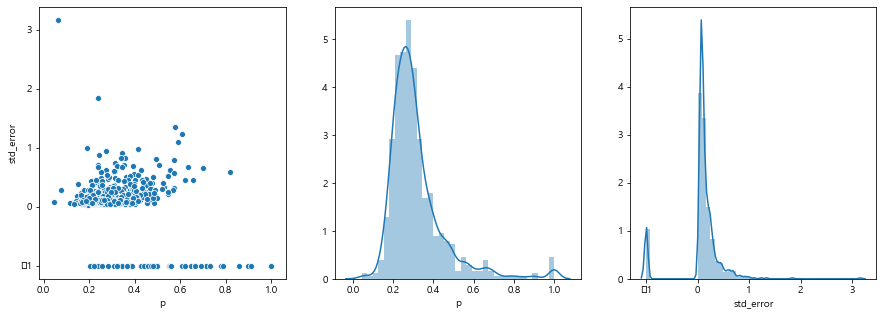

In [8]:
plt.figure(figsize = (15, 5))

plt.subplot(1,3,1)
sns.scatterplot(group_city_clss.p , group_city_clss.std_error)
plt.subplot(1,3,2)
sns.distplot(group_city_clss.p)
plt.subplot(1,3,3)
sns.distplot(group_city_clss.std_error)

plt.show()

(0, 1)

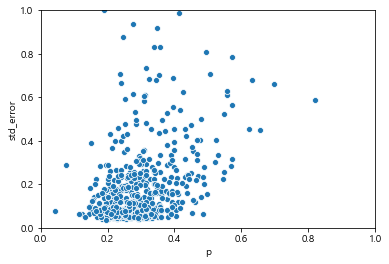

In [9]:
sns.scatterplot(group_city_clss.p , group_city_clss.std_error)
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:
# p >= 0.5인 그룹에서 std가 크게 증가한다.
# uncomplte group은 p가 0.5 보다 큰 영역에서만 존재한다.

### Make Plot Function

In [10]:
def plot_groups_by_month(group_list, log = False, figsize = (15,30)):
    plt.figure(figsize = figsize)
    for index in range(len(group_list)):
        all_month = ['201901', '201902', '201903', '201904', '201905', '201906', '201907',
                 '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003', '202004']
        new_y = {}
        city, clss = group_list[index]
        for month in all_month:
            if month in list(map(str, group_city_clss_time.loc[city, clss].index)):
                new_y[month] = int(group_city_clss_time.loc[city, clss, int(month)])
            else:
                new_y[month] = 0
                
        new_y = list(new_y.values())
        if log == True:
            new_y = np.log(new_y)
            
        plt.plot(all_month, new_y, 'o-', label = group_list[index])
        plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize = 15)
        #plt.title(group_list[index][0])
        plt.xticks(rotation = 45, fontsize = 15)
    plt.show()
    
def plot_city_clss_by_month(city, clss, color = 'red', count_ratio = 1):
    all_month = ['201901', '201902', '201903', '201904', '201905', '201906', '201907',
                 '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003', '202004']
    new_amt = {}
    new_count = {}
    mean_amt = group_city_clss_time.loc[city, clss].mean()
    
    if len(group_city_clss_time.loc[city, clss].index) != len(all_month):
        print('<AMT가 0인 년월>')
        
    zero_month = []
    for month in all_month:
        if month in list(map(str, group_city_clss_time.loc[city, clss].index)):
            new_amt[month] = int(group_city_clss_time.loc[city, clss, int(month)])
            new_count[month] = int(group_city_clss_time_count.loc[city, clss, int(month)]) * mean_amt/10 * count_ratio
        else:
            new_amt[month] = 0
            new_count[month] = 0
            zero_month.append(month)
    print(zero_month)
    plt.plot(all_month, list(new_amt.values()), 'o-', color = color, label = 'AMT')
    plt.plot(all_month, list(new_count.values()), 'o-', label  = 'COUNT')
    plt.legend()
    plt.title(city + ' ' + clss)
    plt.xticks(rotation = 45)
    plt.show()
    
def plot_multi_group(group_list, figsize = (10,5), log = True):
    # 10개씩 끊어서 시각화 하는 함수
    for i in range(len(group_list)//10 + 1):
        if i == len(group_list)//10:
            plot_groups_by_month(group_list[(i)*10:], figsize = figsize, log = log)
        else:
            plot_groups_by_month(group_list[i*10:(i+1)*10], figsize = figsize, log = log)

### Plot all error_grup in orginal scale

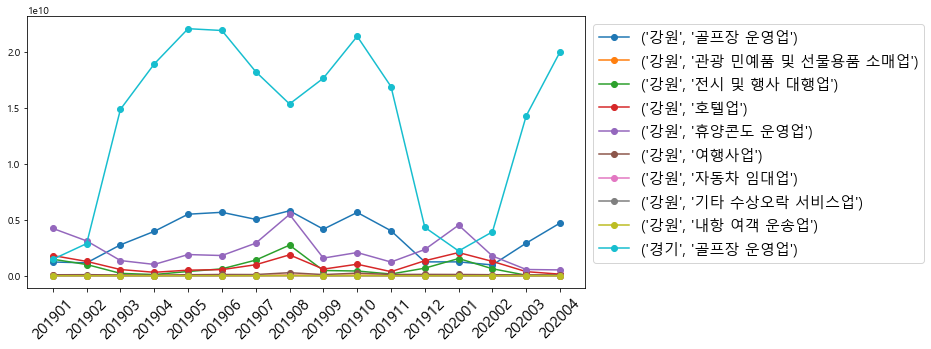

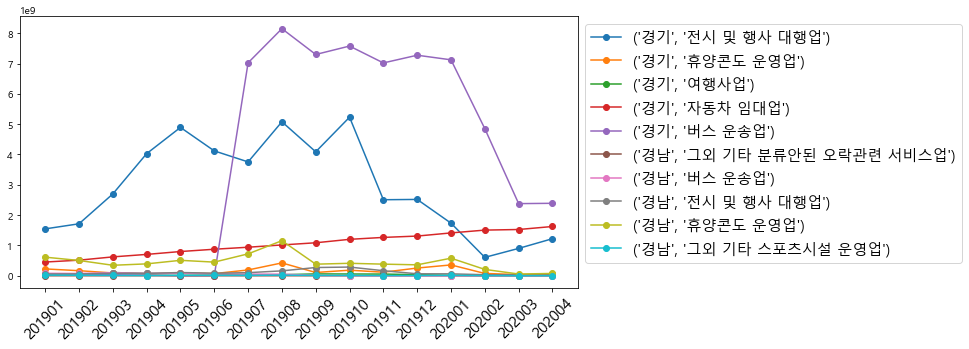

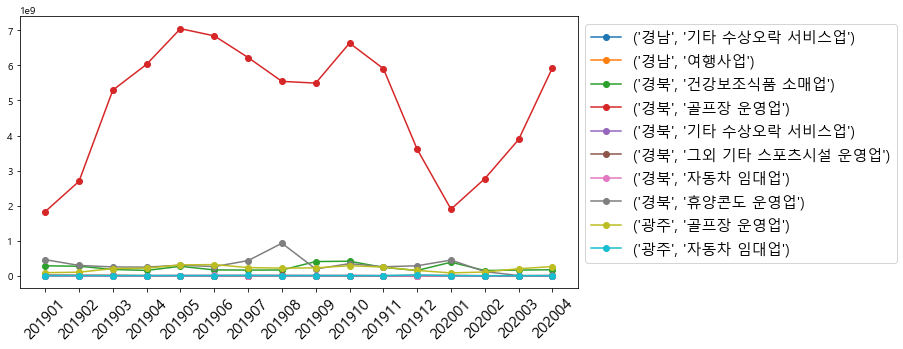

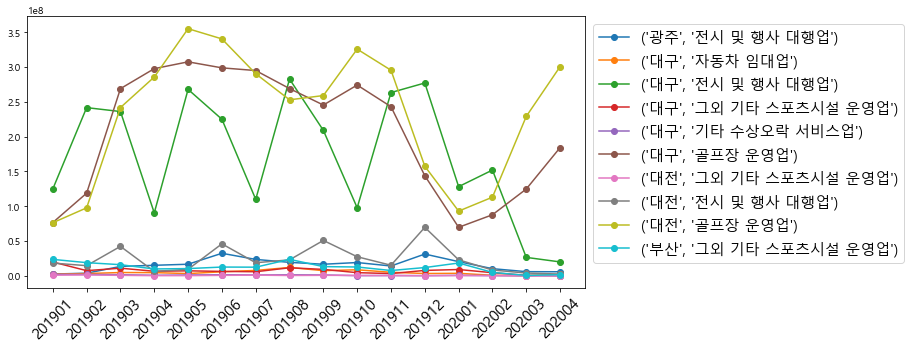

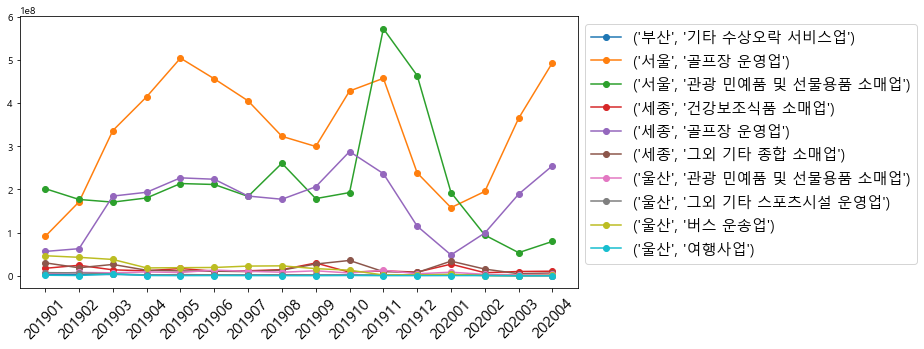

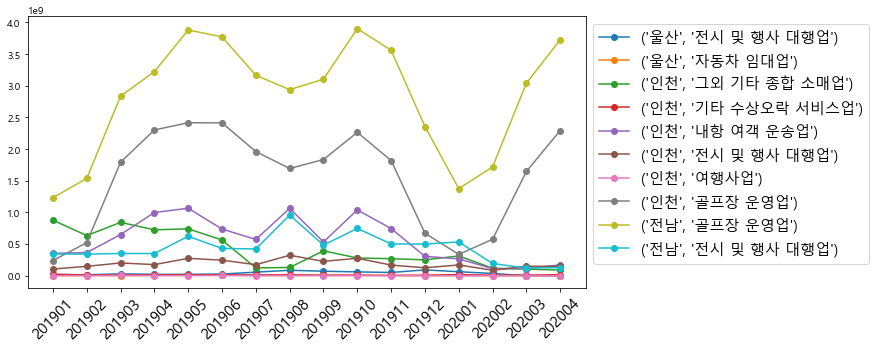

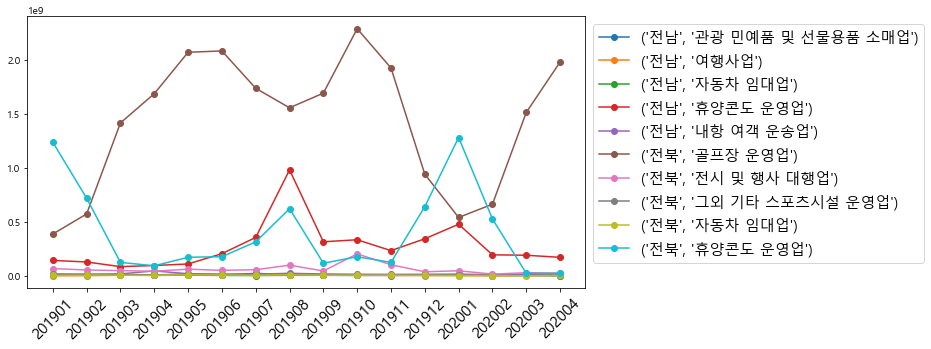

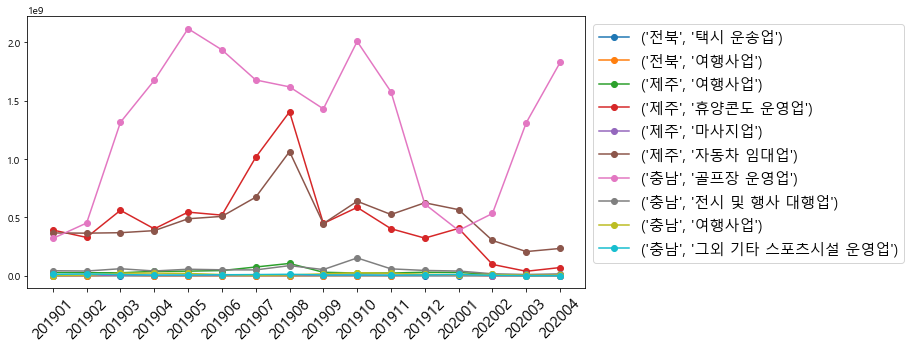

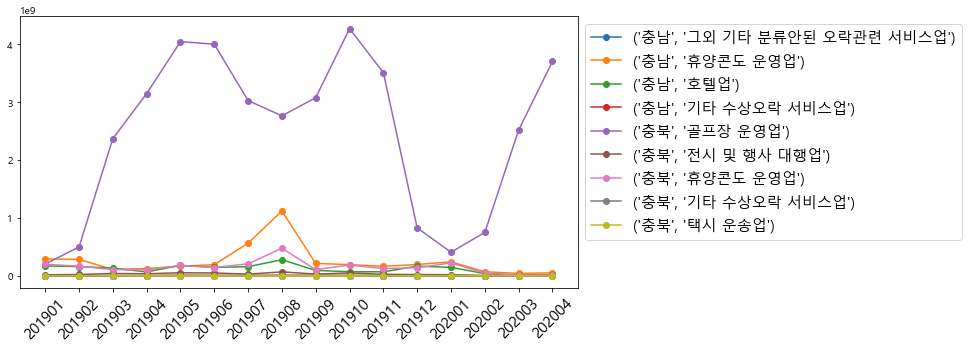

In [17]:
plot_multi_group(error_group, log = False)

### Plot all error_group in log sclae

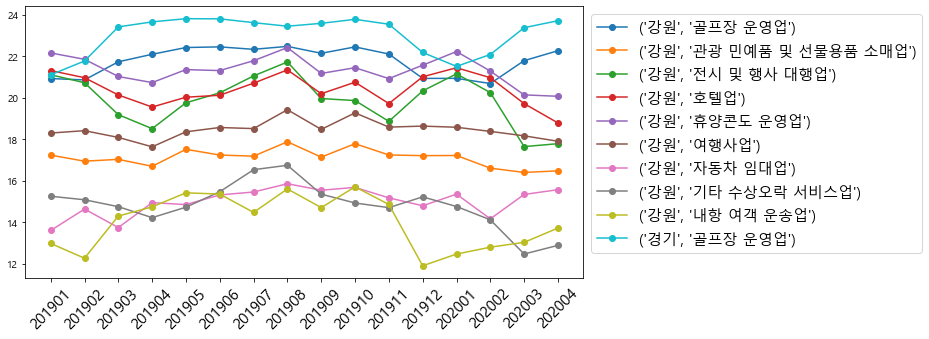

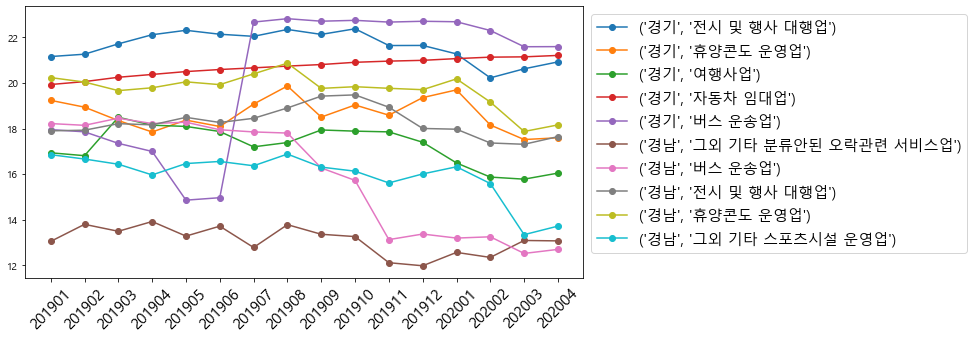

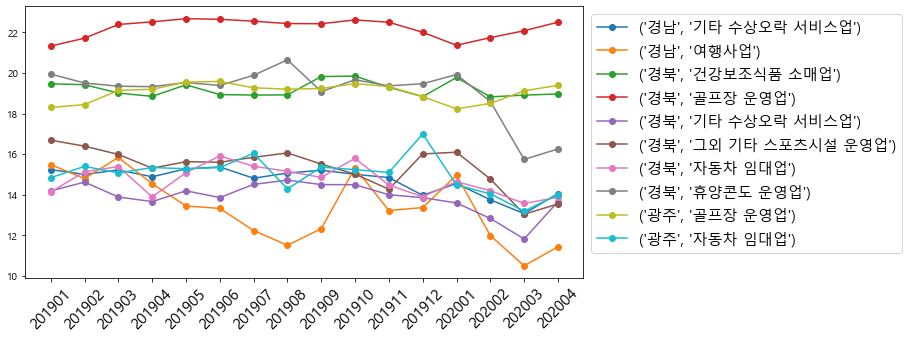

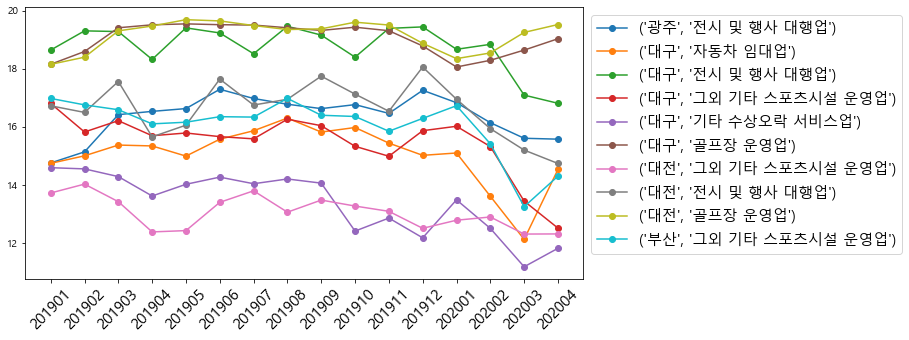

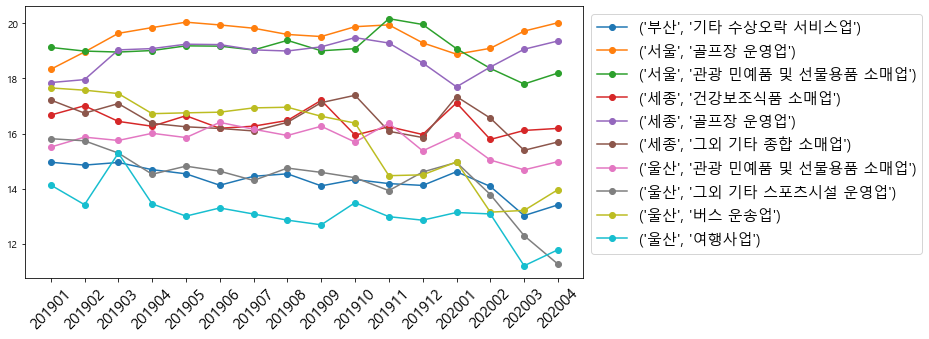

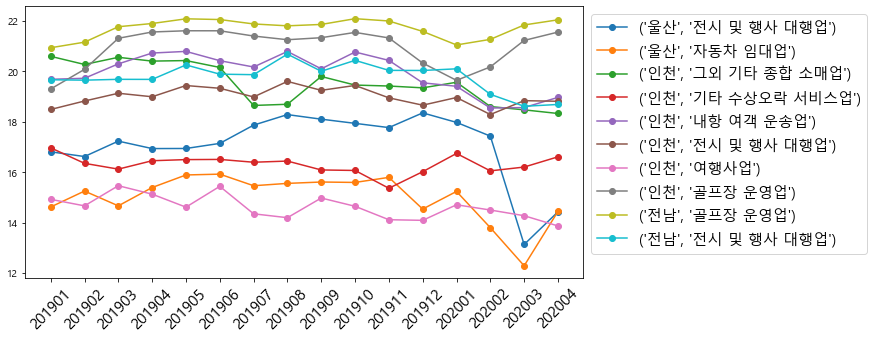

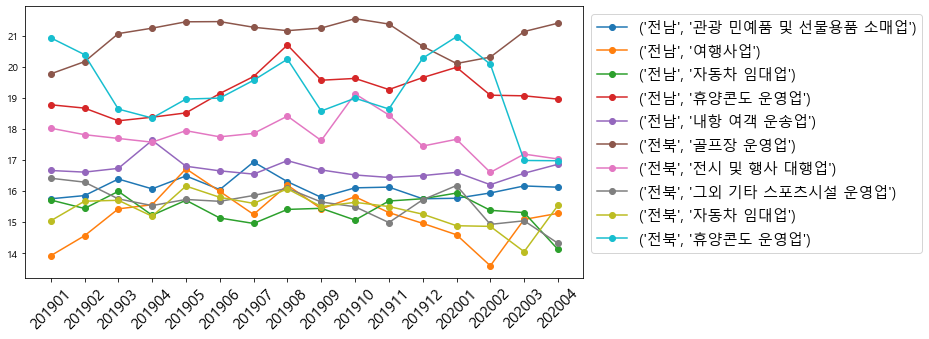

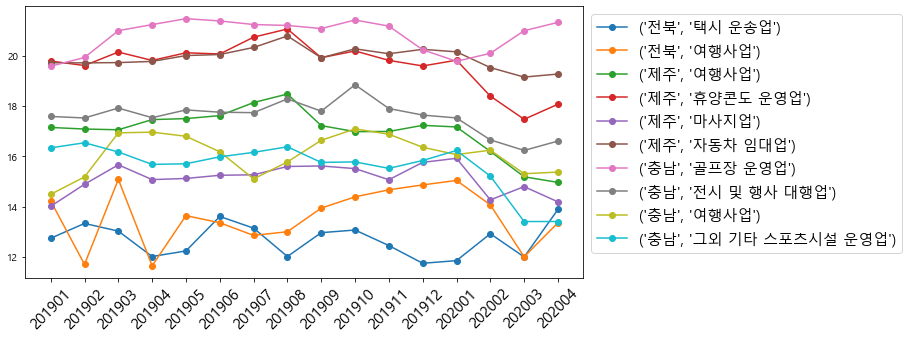

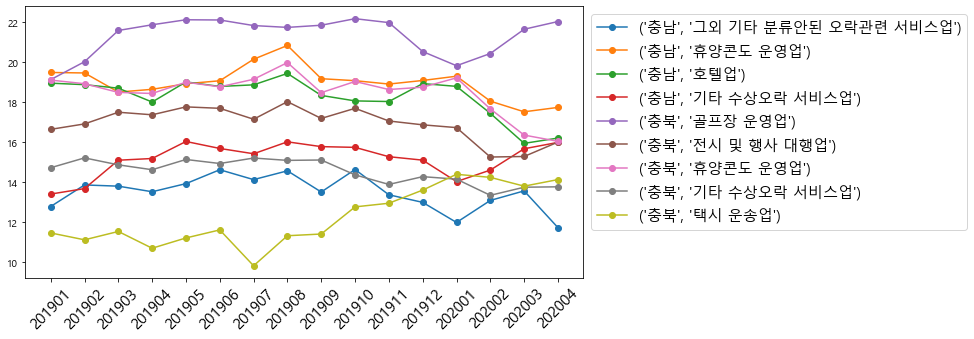

In [16]:
plot_multi_group(error_group, log = True)

## split groups by p

In [12]:
# std가 0.3보다 크면서, p가 0.5보다 작은 그룹 -> 변동성이 작은 그룹
over_std_under_pth = list(group_city_clss.loc[((group_city_clss.p < 0.5) & (group_city_clss.std_error > 0.3))].index)

# std가 0.3보다 크면서, p가 0.5보다 커거나 같은 그룹 -> 변동성이 큰 그룹
over_std_over_pth = list(group_city_clss.loc[((group_city_clss.p >= 0.5) & (group_city_clss.std_error > 0.3))].index)

### 변동성이 작은 그룹 plotting

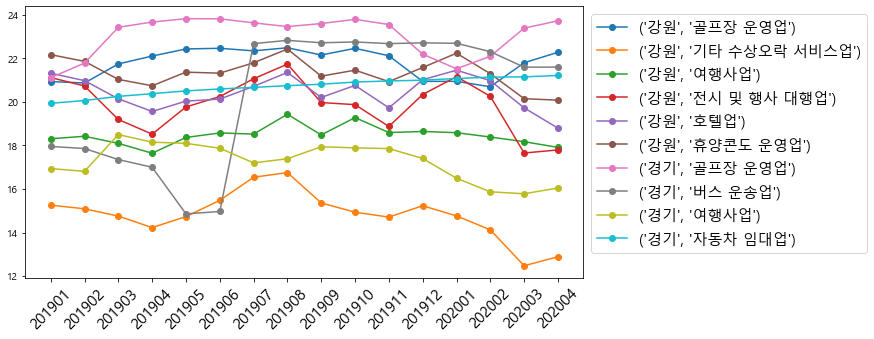

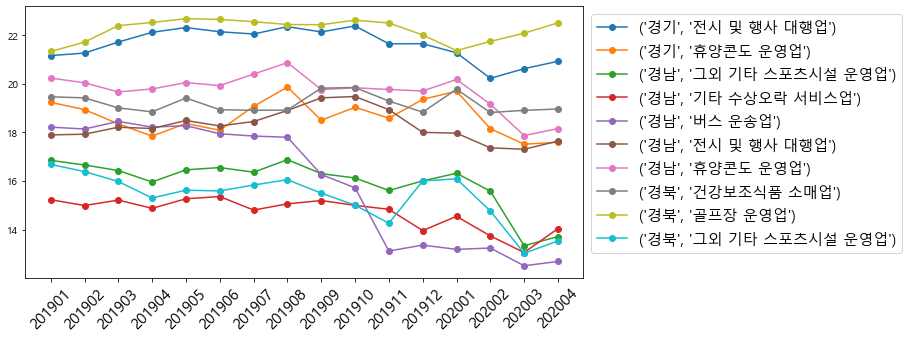

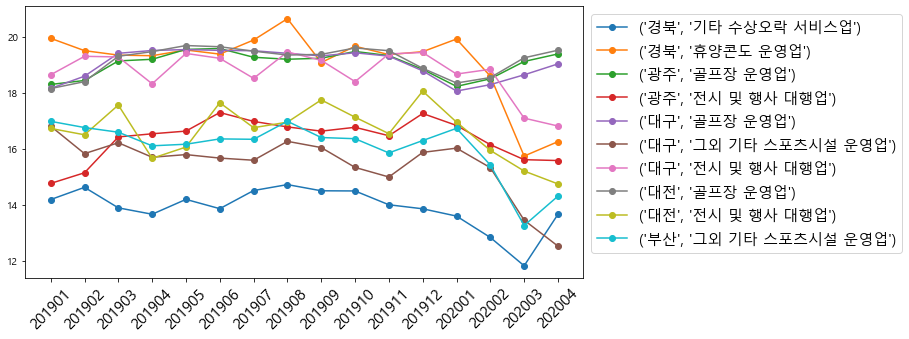

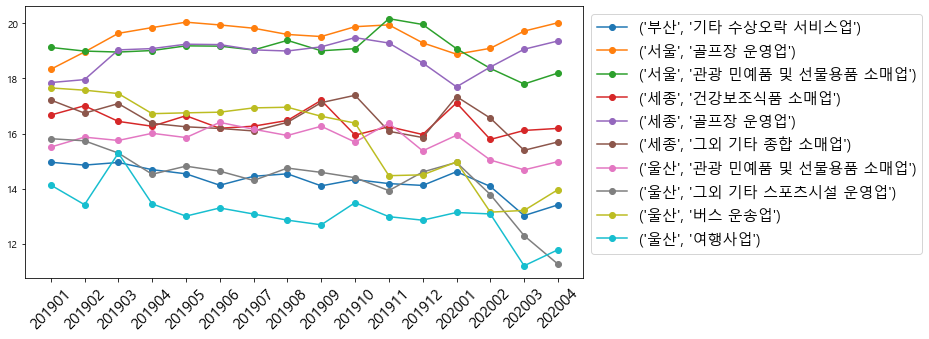

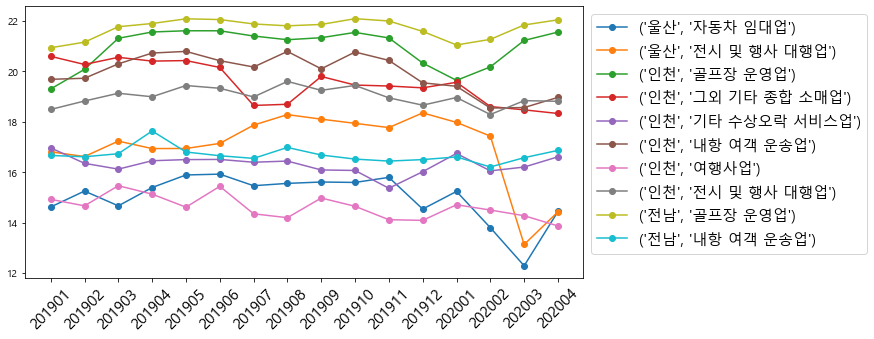

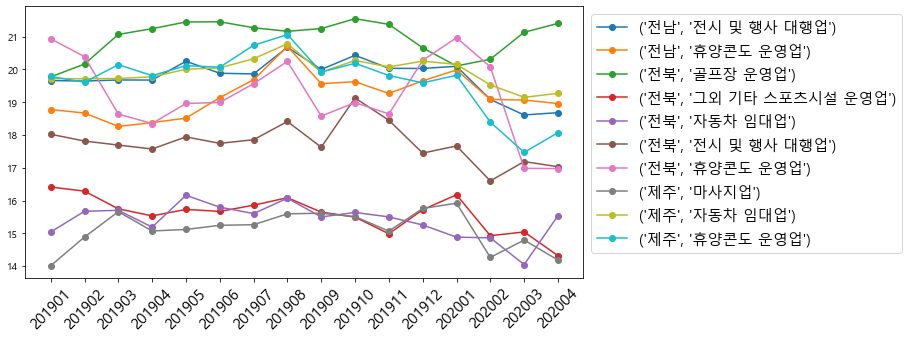

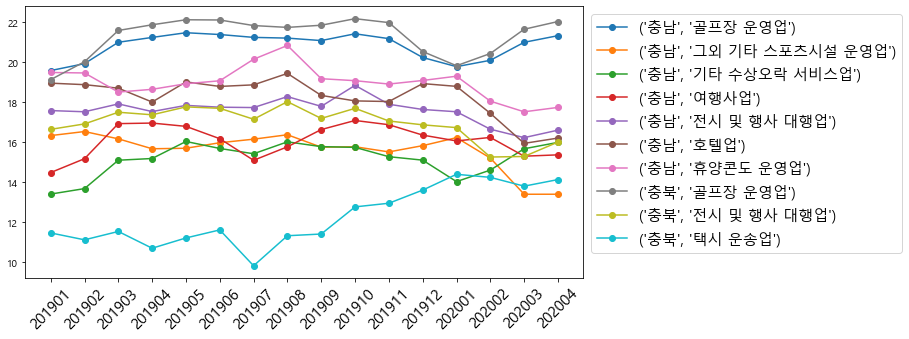

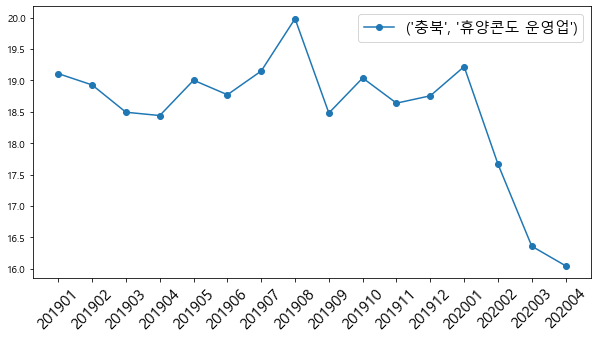

In [14]:
# 변동성이 작은 그룹
plot_multi_group(over_std_under_pth, log = True)

### 변동성이 큰 그룹 plotting

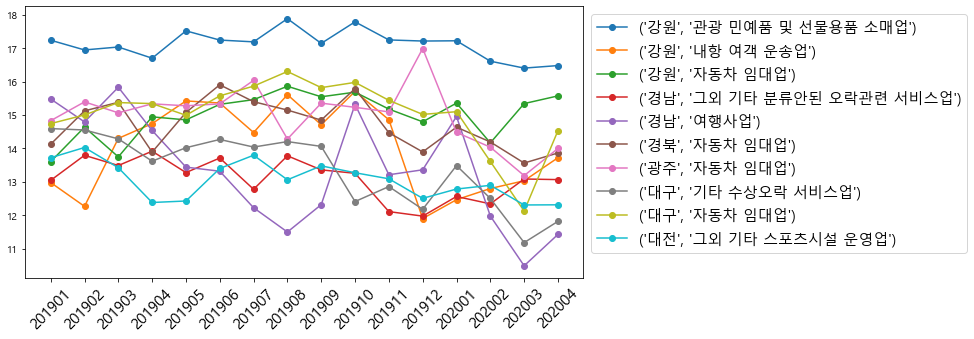

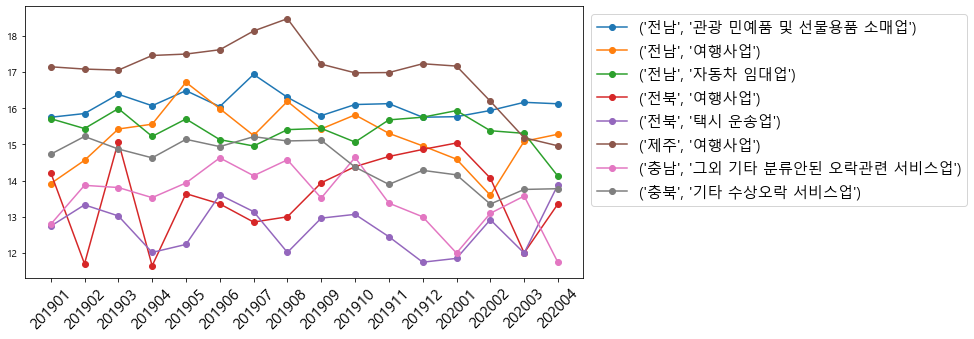

In [15]:
# 변동성이 큰 그룹
plot_multi_group(over_std_over_pth)

## Find Pattern
1. Non-Cov AMT 결정
#### Pseudocode
```python
        if 19년 데이터가 전부 존재:
            19년 데이터만 가지고 std를 계산
            if std > 0.3: # error_group
                if p < 0.5:  ## 변동성이 적다.
                     cov_ratio = (20Y03M/20Y02M) / (19Y03M/19Y02M)

                    if 변화가 선형적이다: .........1)
                        예측7월 <- 올해4월 * cov_ratio
                        올해4월 <- 올해 3월 * cov_ratio

                    else 변화가 비선형적이다:
                        if 계절성을 갖는다.: .........2)
                            예측7월 <- 작년 7월 * cov_ratio
                            예측4월 <- 작년 4월 * cov_ratio

                        elif 특별한 규칙이 없다: .........3)
                            cov_ratio = (20Y03M + 20Y02M) / (19Y03M + 19Y02M)
                            # 특별한 규칙이 없는 경우는 19년 2,3월과
                            # 20년 2,3월의 스케일만을 비교하는 것이 더 효율적이다.
                            예측7월 <- 전체 평균을 사용 * cov_ratio
                            예측4월 <- 전체 평균을 사용 * cov_ratio

                elif p >= 0.5:  ## 변동성이 크다.
                    cov_ratio = (20Y03M/20Y02M) / (19Y03M/19Y02M)

                    if 변화가 선형적이다: .........4)
                        예측7월 <- 올해4월  * cov_ratio

                    else 변화가 비선형적이다:
                        if 계절성을 갖는다.: .........5)
                            예측7월 <- 작년 6월 ~ 8월 평균
                            예측4월 <- 작년 2월 ~ 3월 평균

                        elif 특별한 규칙이 없다: .........6)
                            예측7월 <- 전체 평균을 사용
                            예측4월 <- 전체 평균을 사용

            else std <= 0.3:
                전체 평균을 사용한다. .........7)
                
        else 19년 데이터가 전부 존재하지 않는다: # uncomplete_group
```

## find linear group

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


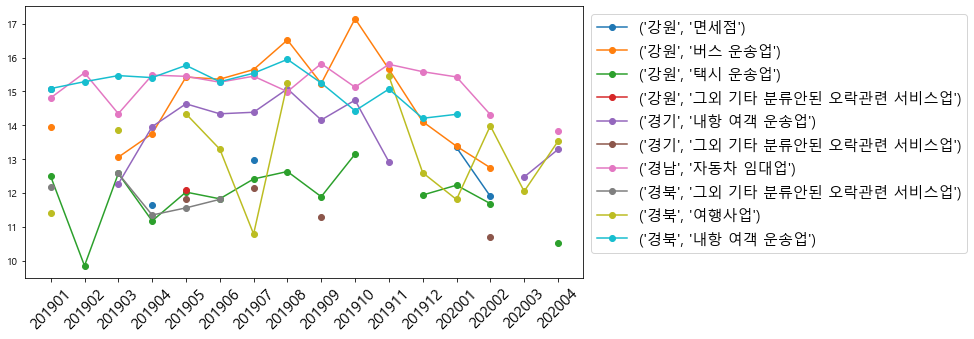

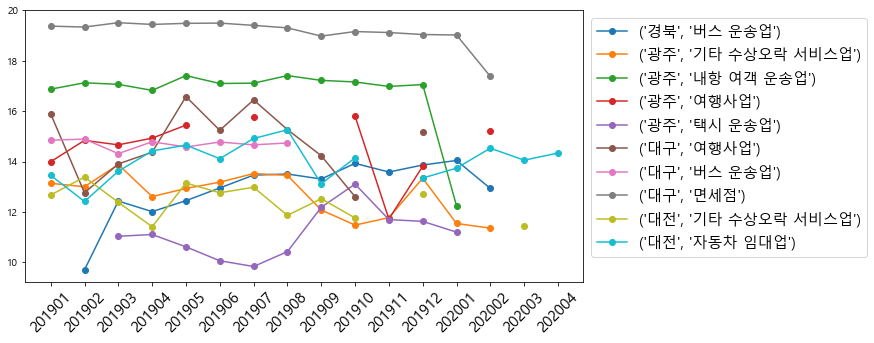

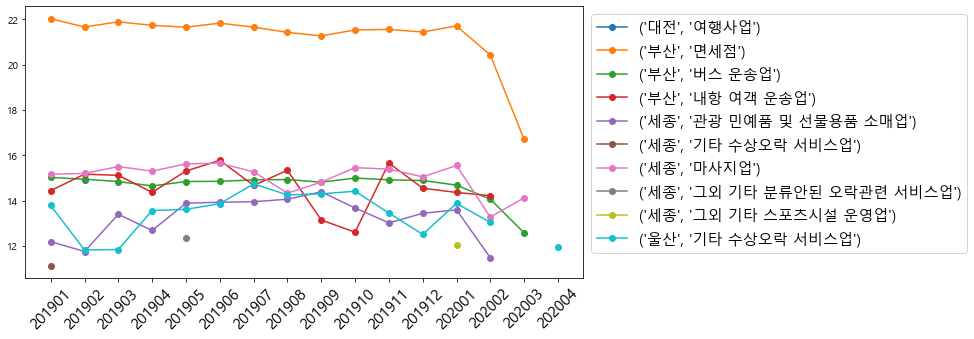

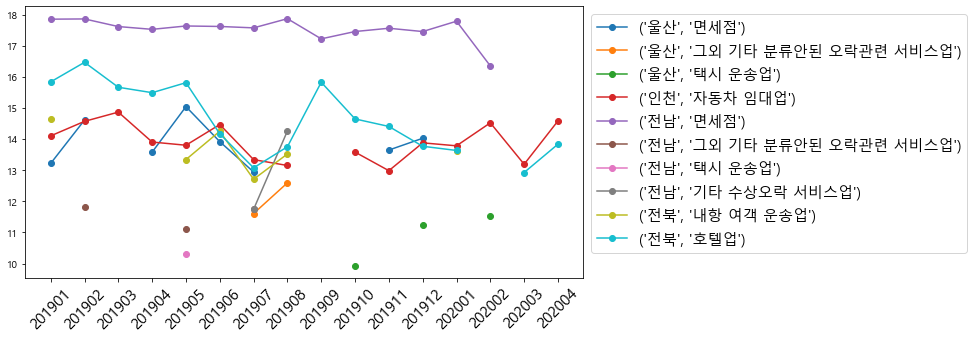

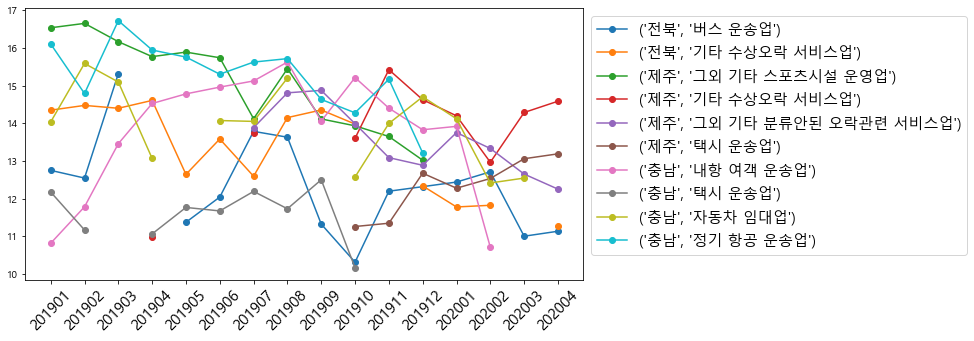

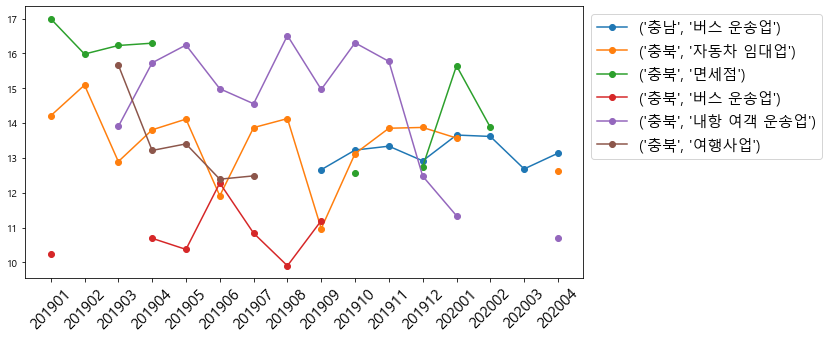

In [18]:
plot_multi_group(uncomplete_group)

<AMT인 년월>
[]


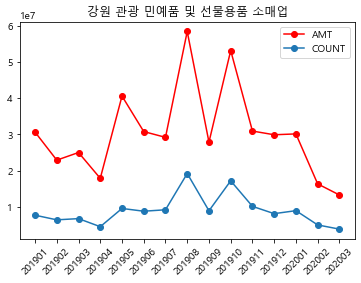

'\n4월 :\n7월 : \n'

In [89]:
i = 1
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


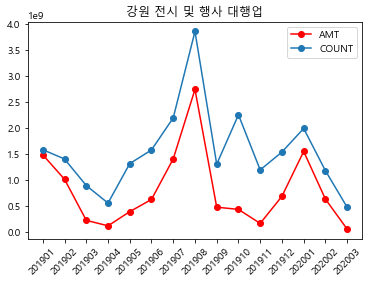

'\n4월 :\n7월 : \n'

In [90]:
i = 2
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


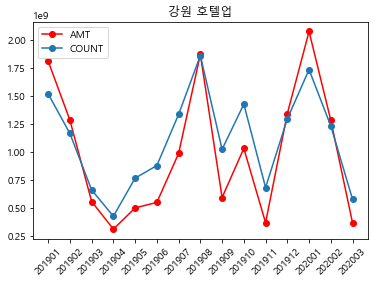

'\n4월 :\n7월 : \n'

In [91]:
i = 3
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


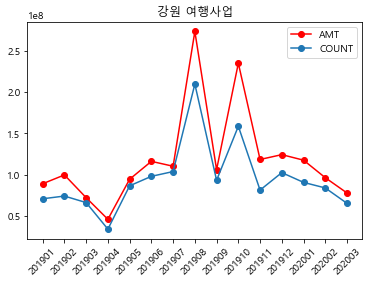

'\n4월 :\n7월 : \n'

In [25]:
i = 5
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


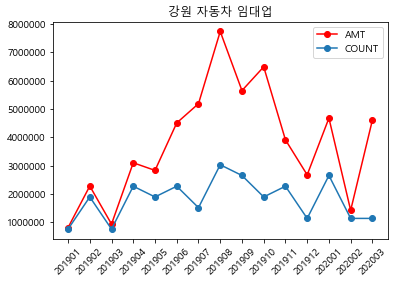

'\n4월 :\n7월 : \n'

In [30]:
i = 6
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 1)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


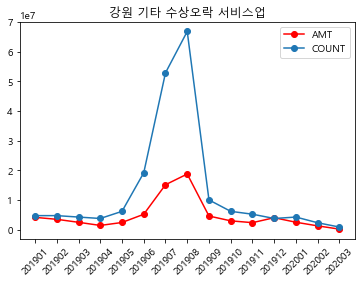

'\n4월 :\n7월 : \n'

In [31]:
i = 7
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 1)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


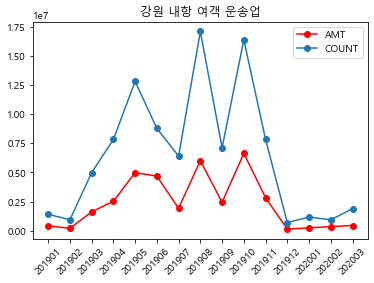

'\n4월 :\n7월 : \n'

In [32]:
i = 8
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 1)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


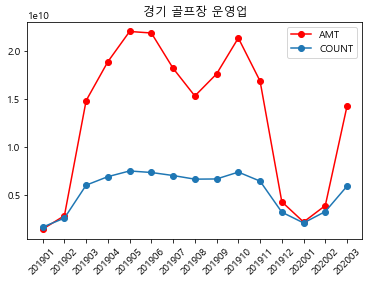

'\n4월 :\n7월 : \n'

In [36]:
i = 9
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.001)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


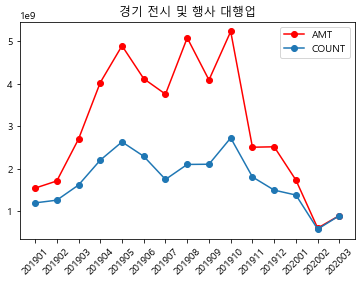

'\n4월 :\n7월 : \n'

In [37]:
i = 10
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.001)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


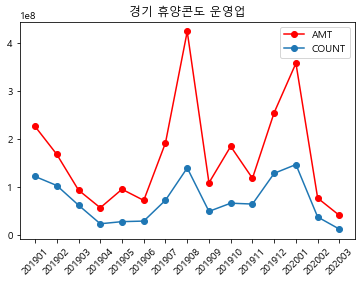

'\n4월 :\n7월 : \n'

In [39]:
i = 11
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


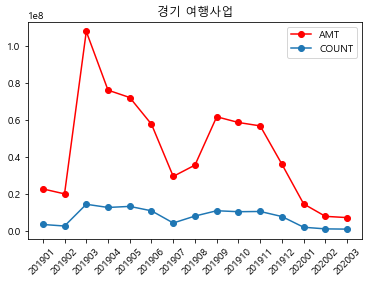

'\n4월 :\n7월 : \n'

In [44]:
i = 12
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


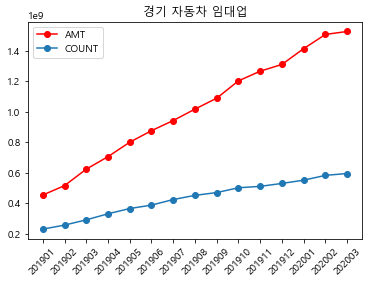

'\n4월 :\n7월 : \n'

In [45]:
i = 13
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

In [ ]:
i = 14
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

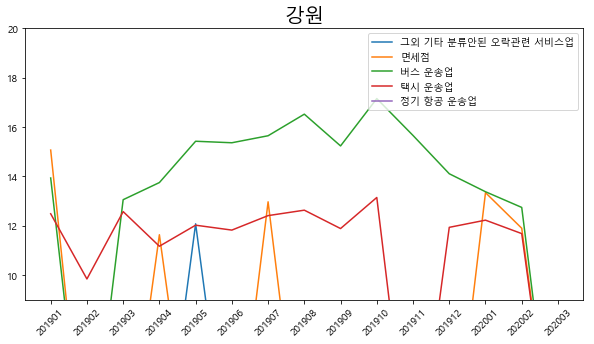

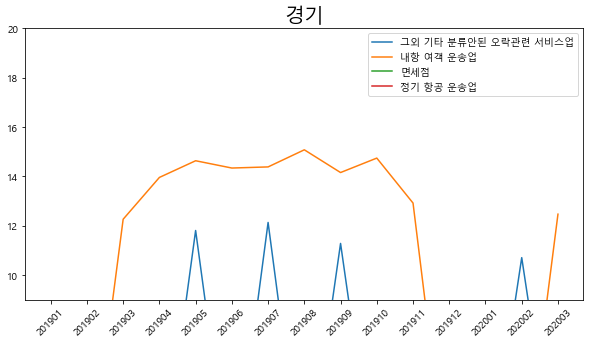

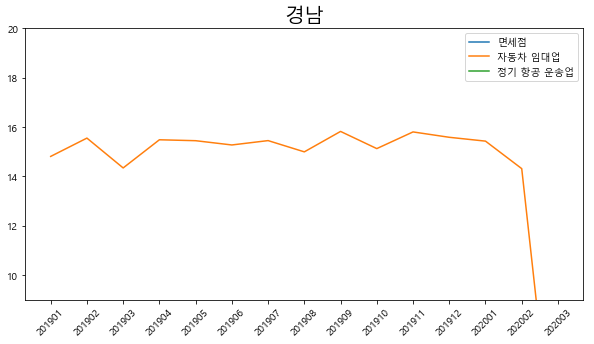

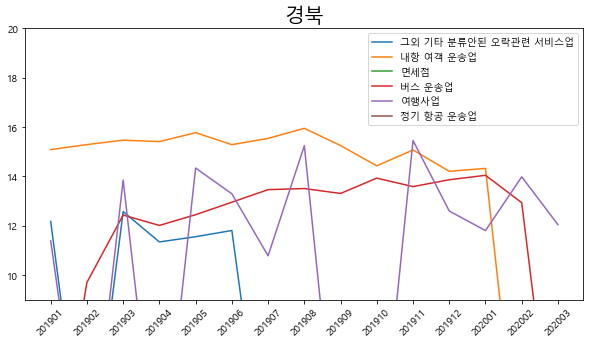

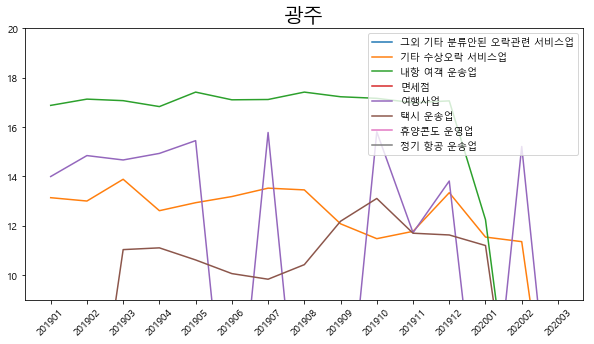

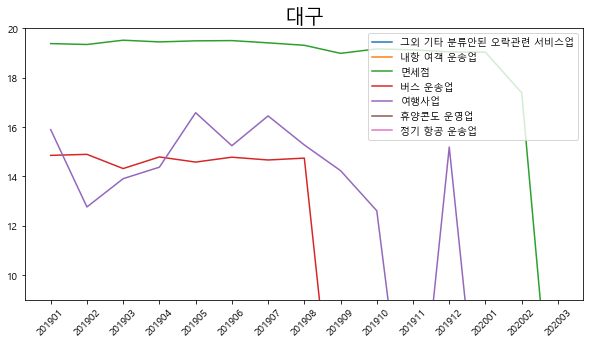

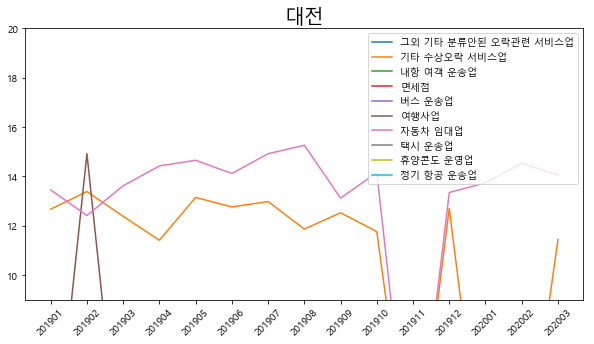

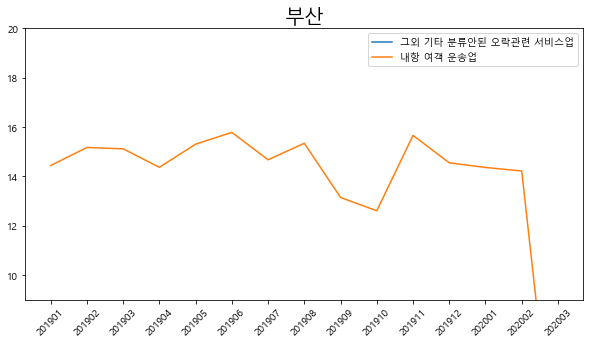

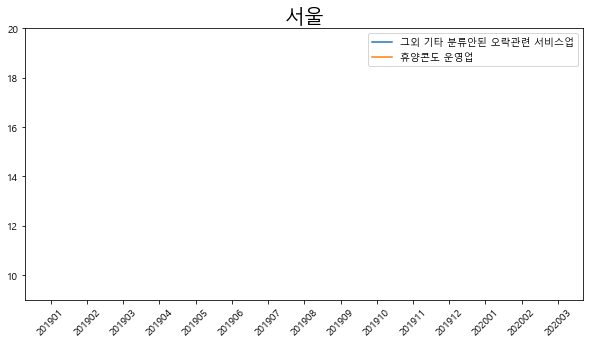

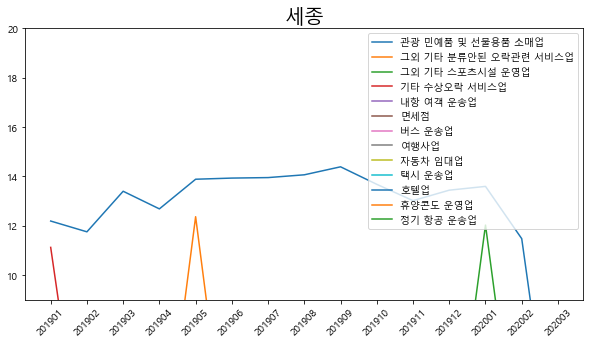

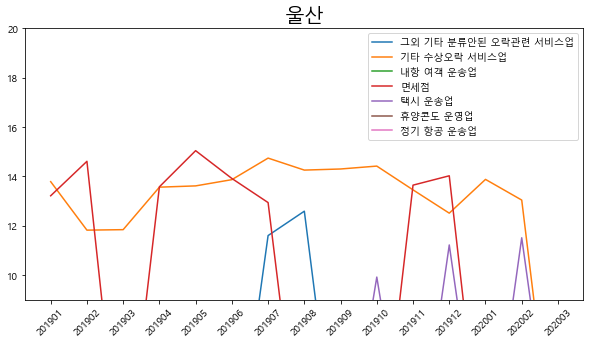

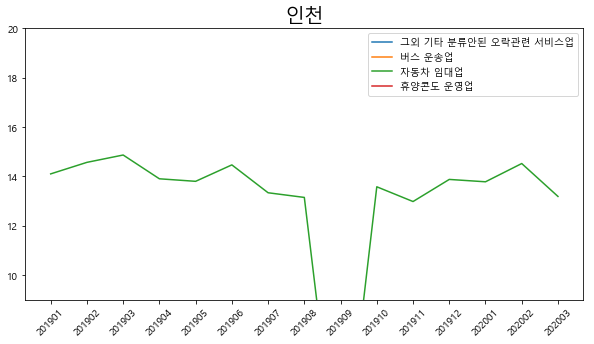

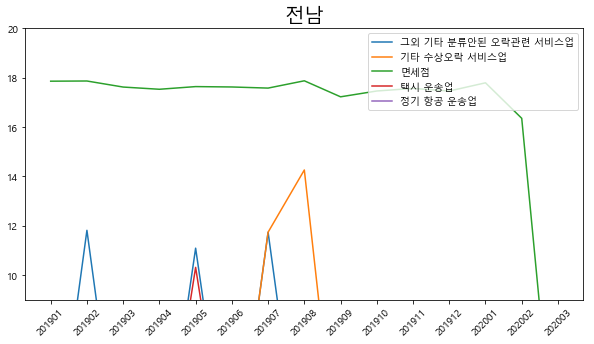

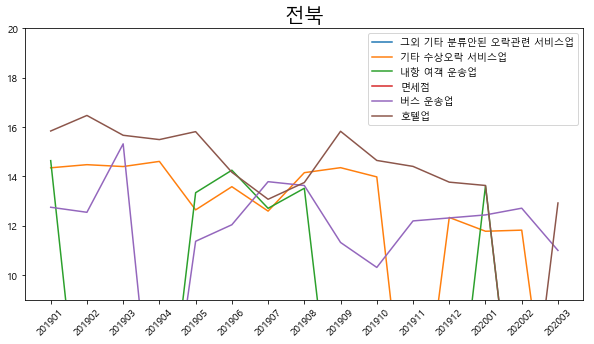

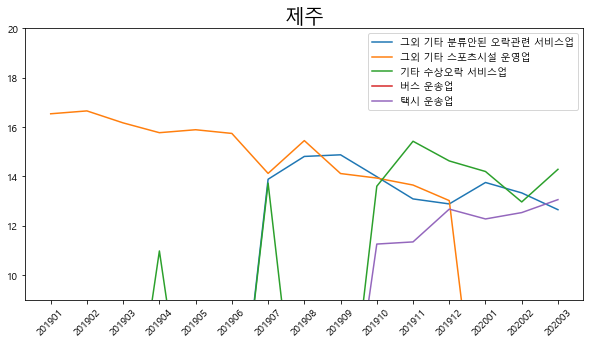

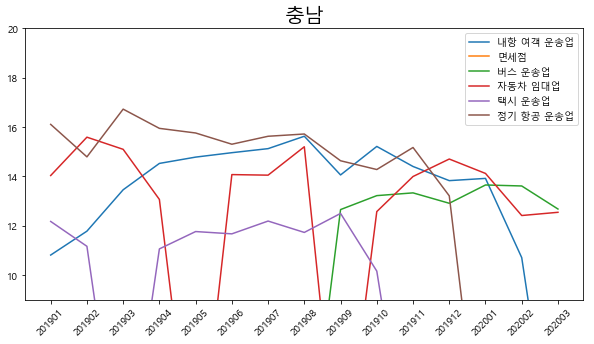

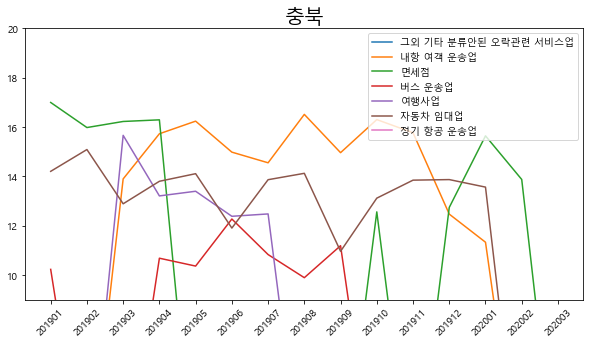

In [9]:
group_data = data.loc[:,['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM', 'AMT']].groupby(['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM']).sum()
group_data = np.log(group_data)
df = group_data.reset_index()
clsses = df.STD_CLSS_NM.unique()

for city in citys:
    plt.figure(figsize = (10, 5))
    df_ = df[df.CARD_SIDO_NM == city][['REG_YYMM','STD_CLSS_NM','AMT']]
    for clss in clsses:
        if len(days) == len(df_[df_.STD_CLSS_NM == clss]):
            pass
        else:
            df_clss = df_[df_.STD_CLSS_NM == clss]
            na_to_one = pd.DataFrame({'REG_YYMM': days, 'STD_CLSS_NM': clss})
            na_to_one.REG_YYMM = na_to_one.REG_YYMM.astype('int64')
            na_to_one = na_to_one.merge(df_clss, on='REG_YYMM', how='outer').drop('STD_CLSS_NM_y', axis=1).fillna(1)
            y = na_to_one["AMT"]   
            plt.plot(days, y, label = clss)
            plt.xticks(rotation = 45)
            plt.ylim(9, 20)
    plt.title(city, size = 20)
    plt.legend(loc = 'upper right')
    plt.show()

# 면세점
## 올해 면세점 매출(전국)
- 1월 2조247억여원
- 석 달 연속 감소하며 4월에는 1조원 미만으로 떨어졌다.
- 그러다 5월 3% 증가한 뒤 두 달 연속 증가세를 이어가며 1조원 초반대를 유지하고 있다.
- 제주 지역 지정면세점 매출은 5월 390억여원에서 6월에는 420억여원으로 증가했다.
- 면세점 매출: 2월부터 반토막 -> 서울이나 다른 지역에 적용 가능할 듯
- 5월 기사: 제주도 서비스업 생산에서 가장 많이 떨어진 분야는 정보통신(-28%)과 숙박·음식점(-23.8%)이다. 코로나19 확진자가 급증했던 대구의 숙박·음식점업 생산은 26%, 운수·창고업은 23.8% 떨어졌다. 경북 지역 역시 숙박·음식점업 생산은 23.0%, 운수·창고업은 11.9% 감소했다.

# 0 예측
## 강원
- 그외 기타 분류안된 오락관련 서비스업: 0
- 면세점: ????
- 버스 운송업: ????
- 택시 운송업: 평균
- 정기 항공 운송업: 0

## 경기
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: 작년 7월 * 코로나상수
- 면세점: 0
- 정기 항공 운송업: 0

## 경남
- 면세점: 0
- 자동차 임대업: 작년 7월 * 코로나상수
- 정기 항공 운송업: 0

## 경북
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: 작년 7월 * 코로나상수
- 면세점: 0
- 버스 운송업: 작년 7월 * 코로나상수
- 여행사업: ????

## 광주
- 그외 기타 분류안된 오락관련 서비스업: 0
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 내항 여객 운송업: 작년 7월 * 코로나상수
- 면세점: 0
- 여행사업: 작년 7월 * 코로나상수
- 택시 운송업: 작년 7월비슷
- 휴양콘도 운영업: 0
- 정기 항공 운송업: 0

## 대구
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: 0
- 면세점: 작년 7월 * 1/2
- 버스 운송업: 0
- 여행 사업: ???
- 휴양콘도 운영업: 0
- 정기 항공 운송업: 0

## 대전
- 그외 기타 분류안된 오락관련 서비스업: 0
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 내항 여객 운송업: 0
- 면세점: 0
- 버스 운송업: 0
- 여행사업: 0
- 자동차 임대: 작년 7월 * 코로나상수
- 택시 운송업: 0
- 휴양콘도 운영업: 0
- 정기 항공 운송업: 0

## 부산
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: 작년 7월 * 코로나상수

## 서울
- 그외 기타 분류안된 오락관련 서비스업: 0
- 휴양콘도 운영업: 0

## 세종
- 관광 민예품 및 선물용품 소매업: 작년 7월 * 코로나상수
나머지 모두 0

울산
- 그외 기타 분류안된 오락관련 서비스업: 0
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 면세점: 작년 7월 * 1/2? 0?
나머지 모두 0

## 인천
- 자동차 임대업: 작년 7월 * 코로나상수
나머지 모두 0

## 전남
- 면세점: 작년 7월 * 1/2
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수 (7, 8월만 운영하는 듯)

## 전북
- 그외 기타 분류안된 오락관련 서비스업: 0
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 내항 여객 운송업: 작년 7월 * 코로나상수? 0?
- 면세점: 0
- 버스 운송업: 작년 7월 * 코로나상수
- 호텔업: 작년 7월 * 코로나상수

## 제주
- 그외 기타 분류안된 오락관련 서비스업: 작년 7월 * 코로나상수
- 그외 기타 스포츠시설 운영업: 
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 버스 운송업: 0
- 택시 운송업: 0은 아님, 다른 지역 추이와 비교해야 할 듯(코로나 영향, 주기성 등), 평균값도 괜찮을듯

## 충남
- 내항 여객 운송업: 작년 7월 * 코로나상수
- 면세점: 0
- 버스 운송업: 0은 아님, 다른 지역 추이와 비교해야 할 듯(코로나 영향, 주기성 등), 평균값도 괜찮을듯
- 자동차 임대업: 작년 7월 * 코로나상수
- 택시 운송업: 0
- 정기 항공 운송업: ??? 값이 꽤 크다가 올해 들어 0... 폐업했나

## 충북
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: ??? 작년 7월 * 코로나상수
- 면세점: ???
- 버스 운송업: 0
- 여행사업: 0
- 자동차 임대업: 작년 7월 * 코로나상수
- 정기 항공 운송업: 0